<a href="https://colab.research.google.com/github/shamita1313-ui/Student-Progress-Tracking-Recommendation-System/blob/main/Student_Progress_Tracking_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df = pd.read_csv('/content/interactions_real_rich_scaled_pprocessed.csv')
print(df.head())


   user_id_new  skill_id_new  user_mean_correct  user_interaction_count  \
0            0             0            0.69279                0.044048   
1            0             1            0.69279                0.044048   
2            0             2            0.69279                0.044048   
3            0             3            0.69279                0.044048   
4            0             4            0.69279                0.044048   

   skill_mean_correct  target_correct_rate  
0            0.869324               0.6000  
1            0.714675               0.8125  
2            0.462885               0.0000  
3            0.617011               0.6000  
4            0.877175               1.0000  


In [3]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32499 entries, 0 to 32498
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id_new             32499 non-null  int64  
 1   skill_id_new            32499 non-null  int64  
 2   user_mean_correct       32499 non-null  float64
 3   user_interaction_count  32499 non-null  float64
 4   skill_mean_correct      32499 non-null  float64
 5   target_correct_rate     32499 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.5 MB
None
user_id_new               0
skill_id_new              0
user_mean_correct         0
user_interaction_count    0
skill_mean_correct        0
target_correct_rate       0
dtype: int64


In [4]:
print(df.describe())



        user_id_new  skill_id_new  user_mean_correct  user_interaction_count  \
count  32499.000000  32499.000000       32499.000000            32499.000000   
mean     692.423828     39.882519           0.684202                0.063681   
std      433.879000     24.594191           0.152862                0.057682   
min        0.000000      0.000000           0.000000                0.000000   
25%      394.000000     19.000000           0.602410                0.016538   
50%      616.000000     39.000000           0.719178                0.045194   
75%     1106.000000     58.000000           0.789474                0.103160   
max     1364.000000    106.000000           1.000000                1.000000   

       skill_mean_correct  target_correct_rate  
count        32499.000000         32499.000000  
mean             0.629105             0.728197  
std              0.145944             0.300136  
min              0.000000             0.000000  
25%              0.543693         

In [5]:
print('Unique users:', df['user_id_new'].nunique())
print('Unique skills:', df['skill_id_new'].nunique())


Unique users: 1365
Unique skills: 107


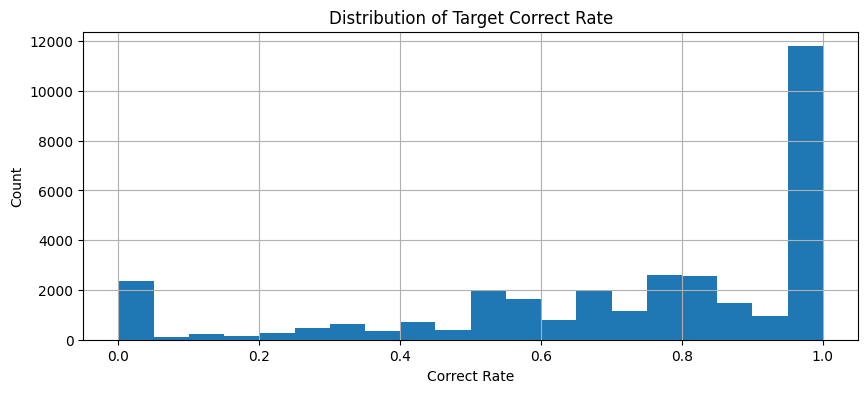

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
df['target_correct_rate'].hist(bins=20)
plt.title('Distribution of Target Correct Rate')
plt.xlabel('Correct Rate')
plt.ylabel('Count')
plt.show()


In [7]:
low_perf_threshold = 0.5

def recommend_skills(user_id):
    skills = df[(df['user_id_new'] == user_id) & (df['target_correct_rate'] < low_perf_threshold)]
    return skills['skill_id_new'].tolist()

user_recommendations = {}
for user in df['user_id_new'].unique():
    user_recommendations[user] = recommend_skills(user)

import pandas as pd

rec_list = [{'user_id_new': user, 'recommended_skills': user_recommendations[user]} for user in user_recommendations]
recommendation_df = pd.DataFrame(rec_list)
recommendation_df.to_csv('/content/user_skill_recommendations.csv', index=False)
print(recommendation_df.head())


   user_id_new                   recommended_skills
0            0  [2, 12, 19, 23, 31, 32, 34, 40, 49]
1            1                                 [74]
2            2                         [26, 40, 43]
3            3     [58, 59, 28, 32, 51, 82, 84, 53]
4            4                                   []


In [8]:
recommendation_df['num_recommendations'] = recommendation_df['recommended_skills'].apply(len)
top_users = recommendation_df.sort_values('num_recommendations', ascending=False).head(10)
print(top_users)

skill_counts = pd.Series([skill for skills in recommendation_df['recommended_skills'] for skill in skills])
most_struggled_skills = skill_counts.value_counts().head(10)
print('Most frequently recommended (difficult) skills:', most_struggled_skills.index.tolist())
print('Counts:', most_struggled_skills.tolist())

recommendation_df.to_csv('/content/user_skill_recommendations.csv', index=False)


      user_id_new                                 recommended_skills  \
295           295  [62, 63, 8, 9, 11, 13, 66, 14, 15, 16, 17, 18,...   
961           961  [58, 59, 2, 3, 5, 60, 61, 62, 63, 12, 13, 15, ...   
954           954  [2, 5, 63, 8, 91, 12, 15, 20, 21, 22, 26, 29, ...   
950           950  [58, 2, 3, 4, 5, 61, 62, 63, 8, 12, 13, 15, 16...   
476           476  [54, 55, 59, 5, 61, 9, 65, 12, 14, 67, 22, 25,...   
1301         1301  [54, 55, 1, 2, 3, 5, 60, 61, 9, 11, 15, 67, 16...   
952           952  [58, 2, 3, 4, 61, 62, 12, 15, 16, 22, 25, 29, ...   
485           485  [55, 58, 1, 2, 3, 60, 61, 62, 63, 8, 64, 65, 1...   
1330         1330  [54, 55, 59, 61, 9, 65, 12, 14, 67, 25, 28, 31...   
953           953  [2, 3, 5, 61, 62, 63, 91, 13, 15, 16, 20, 35, ...   

      num_recommendations  
295                    40  
961                    35  
954                    26  
950                    26  
476                    25  
1301                   24  
952        

In [10]:
top_users.to_csv('/content/top_users_recommendations.csv', index=False)
most_struggled_skills.to_csv('/content/most_struggled_skills.csv')
